# Extensión de funciones a intervalos

# [1]

Amplía tu módulo de intervalos para que incluya la extensión de las funciones estándres monótonas a intervalos. En el caso de las potencias, extiénde lo que ya hayas hecho para que incluya potencias reales. Incluye algunas pruebas en `pruebas.jl` que muestren que lo que has hecho funciona bien.

In [1]:
using Intervalos, PyPlot, Graficador

INFO: Loading help data...


In [2]:
methods(Intervalo)

# 3 methods for generic function "Intervalo":
Intervalo(a::BigFloat,b::BigFloat) at /home/santiago/Documentos/Escuela-maestría/1er-semestre/Física-computacional/Clase/MisModulos/Intervalos/src/Intervalos.jl:15
Intervalo(a,b) at /home/santiago/Documentos/Escuela-maestría/1er-semestre/Física-computacional/Clase/MisModulos/Intervalos/src/Intervalos.jl:30
Intervalo(a) at /home/santiago/Documentos/Escuela-maestría/1er-semestre/Física-computacional/Clase/MisModulos/Intervalos/src/Intervalos.jl:32

In [3]:
inter1=Intervalo("2","2.5")
inter2=Intervalo("0","0.5")

[0e+00,
5e-01]

####Lo siguiente era parte del código pero ahora es texto porque está incluido en el módulo Intervalos

function redonUP(f::Function,x,y)
    with_rounding(BigFloat,RoundUp) do 
        f(BigFloat(x),BigFloat(y)) 
    end
end

function redonDOWN(f::Function,x,y)
    with_rounding(BigFloat,RoundDown) do 
        f(BigFloat(x),BigFloat(y))
    end
end

function redonUP(f::Function,x)
    with_rounding(BigFloat,RoundUp) do 
        f(BigFloat(x))
    end
end

function redonDOWN(f::Function,x)
    with_rounding(BigFloat,RoundDown) do 
        f(BigFloat(x))
    end
end


import Base.exp
import Base.log
import Base.atan
import Base.asin
import Base.acos

exp(x::Intervalo)=Intervalo(redonDOWN(exp,x.a),redonUP(exp,x.b))


log(x::Intervalo)= x.a<0 ? error("Función log no acepta números negativos \n") : Intervalo(redonDOWN(log,x.a),redonUP(log,x.b))


atan(x::Intervalo)=Intervalo(redonDOWN(atan,x.a),redonUP(atan,x.b))

asin(x::Intervalo)=
        x.a<-1||x.b>1 ? error("Función asin solo acepta números entre -1 y 1 \n") : Intervalo(redonDOWN(asin,x.a),redonUP(asin,x.b))

acos(x::Intervalo)=
        x.a<-1||x.b>1 ? error("Función acos solo acepta números entre -1 y 1 \n") : Intervalo(redonDOWN(acos,x.b),redonUP(acos,x.a))

^(x::Intervalo,y)=exp(y*log(x))

In [240]:
#println(asin(inter1)) #este genera un error, como debería
#println(acos(inter1)) #este genera un error, como debería

Lo siguiente está incluido en el test.jl del módulo Intervalo

In [4]:
using FactCheck

In [5]:
facts("Probando funciones sobre intervalos")do
    interv1=Intervalo("0.0","0.5")
    @fact exp(BigFloat(1.0)) => exp(Intervalo("1.0")).b
    @fact exp(Intervalo(1)).a => less_than(exp(Intervalo(1)).b) #checo redondeo
    @fact exp(interv1).a => 1.0
    @fact exp(interv1).b => greater_than_or_equal(exp(interv1.b))
    
    @fact log(interv1).a => -inf(BigFloat)
    @fact log(interv1).b => greater_than_or_equal(log(interv1.b))
    @fact log(interv1).b => less_than(1.0)
    
    @fact atan(interv1).a => 0.0
    @fact atan(interv1).b => greater_than_or_equal(atan(interv1.b))
    @fact atan(Intervalo(inf(BigFloat))).a => π/BigFloat(2)
    @fact atan(Intervalo(-inf(BigFloat))).b => π/BigFloat(-2)
    
    @fact asin(interv1).a => 0.0
    @fact asin(interv1).b => greater_than_or_equal(asin(interv1.b))
    @fact asin(Intervalo(1)).a => π/BigFloat(2)
    @fact asin(Intervalo(-1)).b => π/BigFloat(-2)
    
    @fact acos(interv1).a => less_than_or_equal(acos(interv1.b))
    @fact acos(interv1).b => nextfloat(π/BigFloat(2))
    @fact acos(Intervalo(1)) => Intervalo(0,0)
    @fact acos(Intervalo(-1)).a => π
    
    @fact (interv1^"0.5").a => 0.0 
    @fact (interv1^3.1).b => greater_than_or_equal((interv1.b)^3.1) #si este manda error, falta incluir redondeo
end;

Probando funciones sobre intervalos
21 facts verified.


In [6]:
include("../../MisModulos/Intervalos/test/pruebas.jl");

Probando tipo Intervalo
8 facts verified.
Probando operaciones entre intervalos
13 facts verified.
Probando funciones sobre intervalos
21 facts verified.


#[2]

¿Cómo definirías la extensión a intervalos para funciones no monótonas? Repite [1] para este caso.

# [3]

La extensión natural del intervalo para $f(x)=x/(1+x^2)$ es $F(\mathbf{x})=\mathbf{x}/(1+\mathbf{x}^2)$. ¿Cuál es la extensión natural del intervalo para $\mathbf{x}=[1,2]$? ¿Cómo se compara con el rango $R(f;[1,2])$. Ilustra los resultados con una gráfica.

In [5]:
disper(x)=x/(1+x^2)

disper (generic function with 1 method)

La extención natural es:

In [6]:
disper(Intervalo(1,2))

[1.999999999999999999999999999999999999999999999999999999999999999999999999999983e-01,
1e+00]

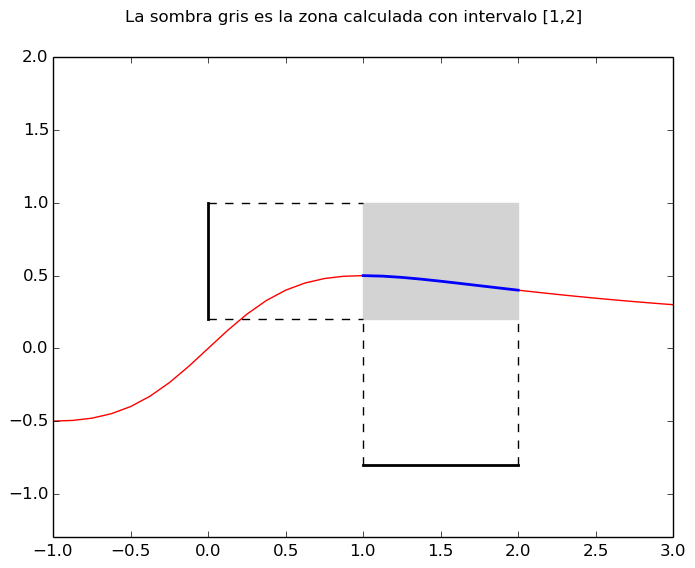

In [7]:
graficador(1,2,disper);

Sin embargo el rango es $R(f;[1,2])=[0.5,0.4]$

In [9]:
(disper(1),disper(2))

(0.5,0.4)

# [4]

# Rutina para encontrar raíces de una función